# **7. Кластеризация на основе плотности**

## Такая кластеризация находит в датасете области с высокой плотностью и на их основе образует кластеры. Редкие объекты, которые находятся в отдалении от других данных и для которых нужен отдельный кластер, считаются **шумом**.

## Задание 7.1

Как вы думаете, какие данные могут образовывать датасет с высокой плотностью?

+ Данные о заказах такси в пятничный вечер
+ Данные студенческой поликлиники о медицинских анализах

В пятничный вечер много людей идут отдыхать в театры, рестораны, кино, поэтому плотность данных будет высокой.

В студенческой поликлинике большинство студентов здоровы, а значит кластеры с отличными показателями организма имеют высокую плотность. Данные оставшихся студентов, имеющих заболевания, будут считаться выбросами на фоне остальных данных.

## При кластеризации на основе плотности нам не нужно задавать количество кластеров — алгоритм сам определяет оптимальное число. Такой алгоритм кластеризации отлично справляется с выбросами и с данными произвольной формы.

### Наиболее популярный алгоритм кластеризации на основе плотности — **DBSCAN**. Далее мы рассмотрим его подробнее.

# DBSCAN (DENSITY-BASED SPATIAL CLUSTERING OF APPLICATIONS WITH NOISE)

Данный алгоритм применим, если:

+ перед вами стоит задача с данными сложной формы, например выделение районов на карте:

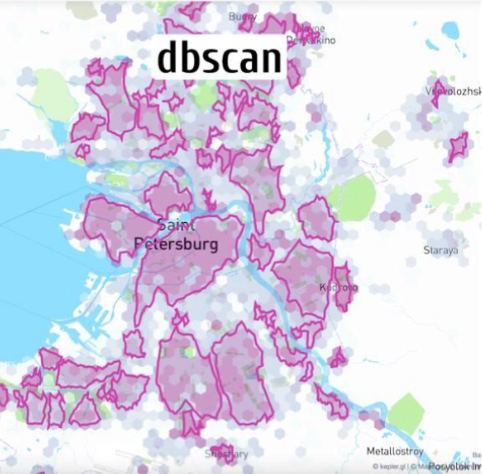

+ в данных большое количество выбросов, например данные медицинских анализов пациентов.

В таких случаях ранее изученный алгоритм k-means не поможет. Зато на помощь придёт DBSCAN.

### **Преимущества алгоритма DBSCAN:**

+ В отличие от k-means, не нужно задавать количество кластеров — алгоритм сам определит оптимальное.
+ Алгоритм хорошо работает с данными произвольной формы.
+ DBSCAN отлично справляется с выбросами в датасетах.

Посмотрим на рисунок, где показано, как два разных алгоритма отрабатывают на разных данных. Первая строчка — это алгоритм DBSCAN, вторая — k-means. Данные имеют разное распределение: например, данные в первом столбце распределены в виде двух окружностей (синей и оранжевой), данные в четвёртом столбце — в виде трёх отдельных кластеров.

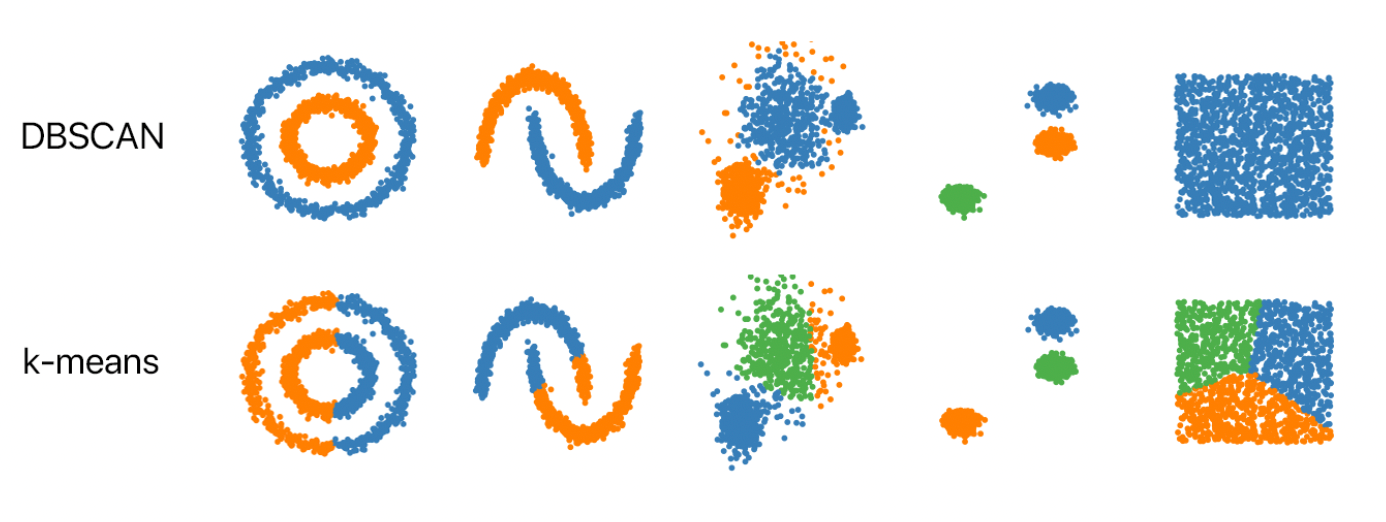

Как видим, алгоритм DBSCAN хорошо справился с первыми двумя способами кластеризации, а в третьем случае результаты работы обоих алгоритмов несколько спорные. Если датасеты хорошо разделены, как в четвёртом случае, оба алгоритма справляются хорошо. Если данные образуют один участок с одинаковой плотностью данных, DBSCAN не может разделить такие данные.

Давайте подробнее посмотрим, как работает DBSCAN. Допустим, у нас есть признаки $X$ = {$x_1$, $x_2$} (значения роста и веса людей). Если визуализировать эти данные, становится понятно, что их можно разделить на два кластера, а также наблюдаются выбросы (серые точки):

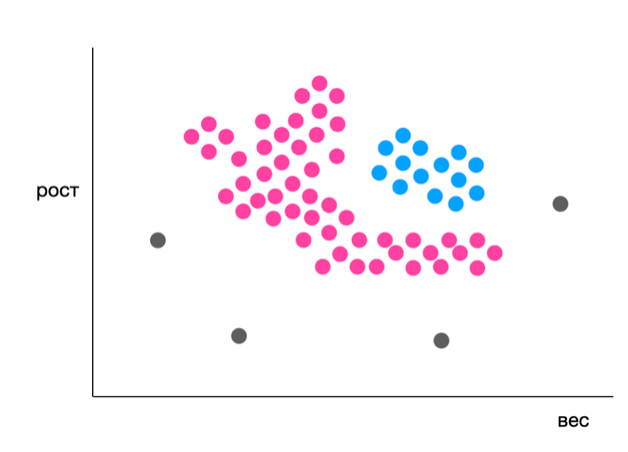

Так как розовый кластер огибает синий, у стандартных методов вроде k-means могут быть трудности при кластеризации. При использовании k-means мы можем получить следующие результаты:


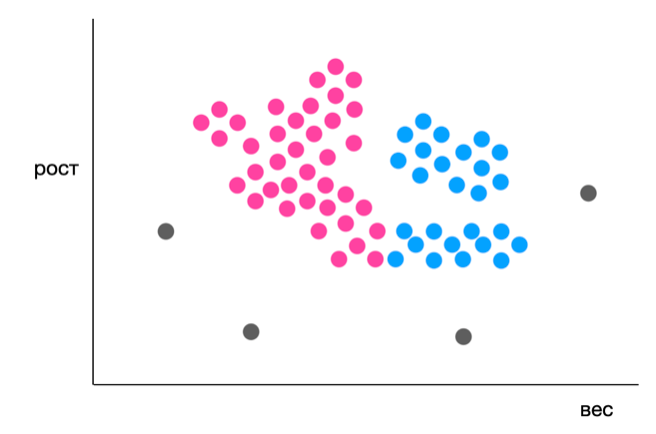

Алгоритм DBSCAN поможет не допустить такого.

### → Чтобы понять, как он работает, вспомните, на какую информацию вы обращаете внимание, когда смотрите на данные и пытаетесь их кластеризовать. Обычно мы смотрим на плотность распределения данных: там, где большая плотность, и будет кластер, а точки, находящиеся в области низкой плотности, обычно считаются выбросами. Чтобы алгоритм кластеризовал данные, как человек, ему нужно кластеризовать, основываясь на плотности данных.

## **Рассмотрим работу алгоритма кластеризации DBSCAN ↓**

1. Сначала необходимо выбрать случайный объект в данных (на рисунке выбранная точка выделена красным) и в некотором радиусе $r$ от этой точки найти всех соседей. На рисунке окружность выделена оранжевым цветом, а соседи — это все те точки, что попадают в оранжевую окружность. Радиус данной окружности задаётся и может регулироваться пользователем. Далее подсчитаем, сколько точек перекрывает окружность. В данном случае точек пять:

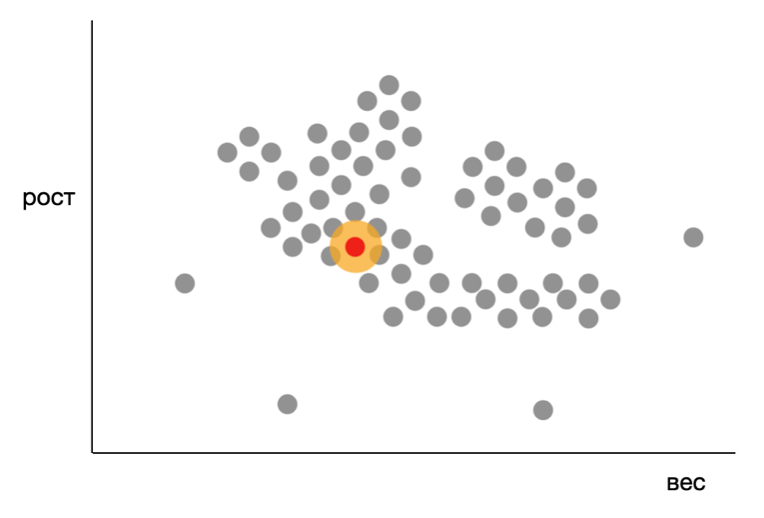

Далее будем выбирать точки в данных и таким же образом находить соседей этих точек.

Посмотрим на одну из точек, которая находится в отдалении от всех других. Можно заметить, что в заданном радиусе у неё нет никаких соседей:

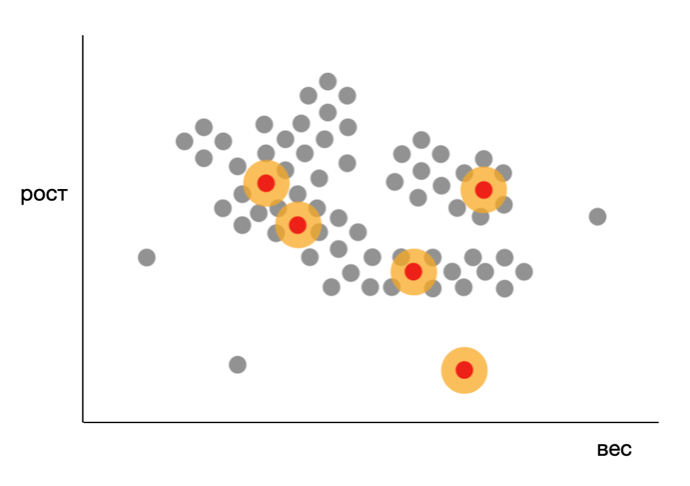

2. Выделим центральные точки (core points).

## **Центральными** будут считаться точки, вокруг которых находится три или более объектов. Данное значение обычно задаётся пользователем.

В наших данных четыре выделенные точки (красные точки на картинке выше) будут считаться центральными, так как вокруг них расположено три и более точек. Пятая красная точка не будет считаться центральной, так как вокруг неё нет соседей.

Находим центральные точки во всём датасете. Это будет выглядеть так:

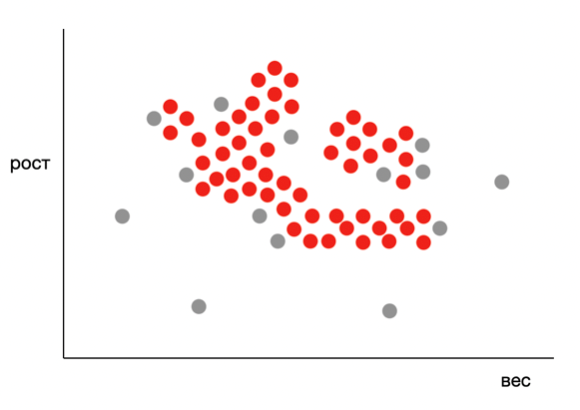

3. Среди центральных точек выберем случайным образом одну и примем, что эта точка относится к первому кластеру. Далее найдём все центральные точки, находящиеся в заданном радиусе от этой точки:

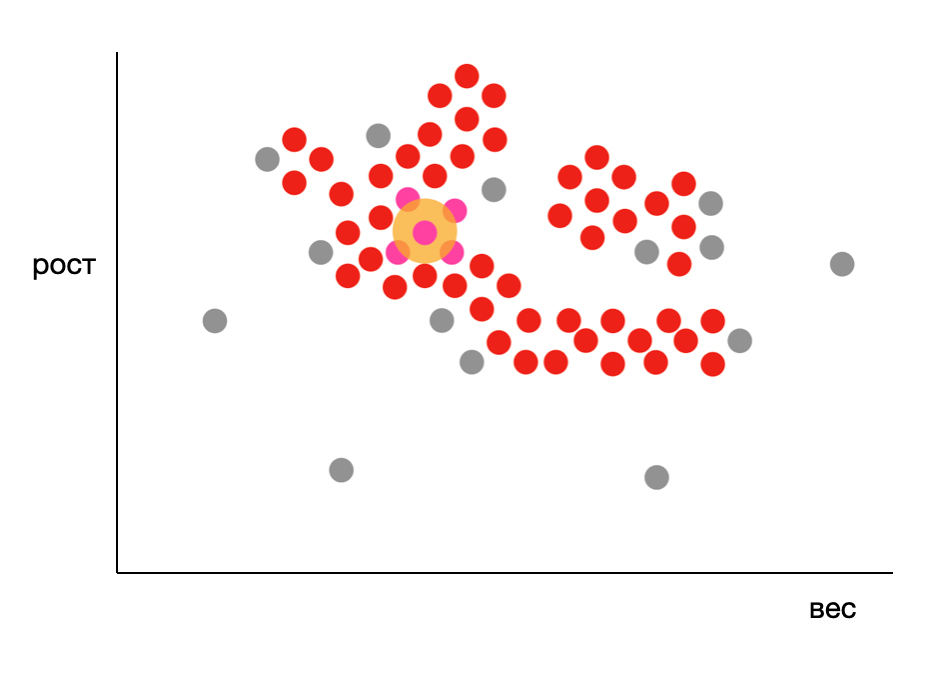

Они также будут отнесены к первому кластеру. На рисунке выше эти точки выделены розовым.

Если же в заданном радиусе окажутся не только центральная, но и нецентральная точки, то на данном этапе такая точка не будет добавлена в кластер. Таким образом, мы получили первый, розовый, кластер:

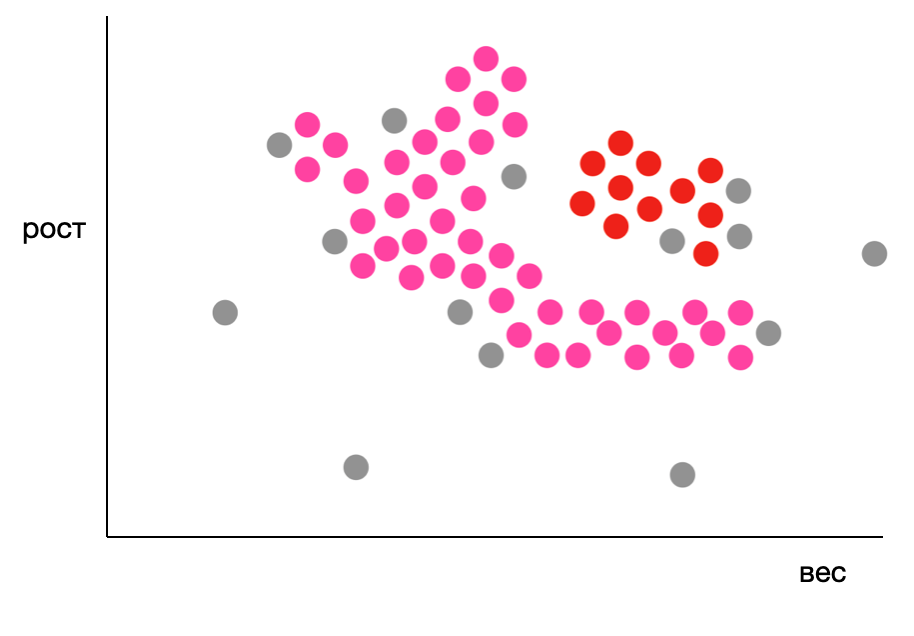

4. После того как центральные точки в первом кластере заканчиваются, мы начинаем находить нецентральные точки, которые располагаются в радиусе $r$ от объектов, принадлежащих первому кластеру. На рисунке ниже эти точки указаны стрелкой и теперь тоже принадлежат к кластеру 1:

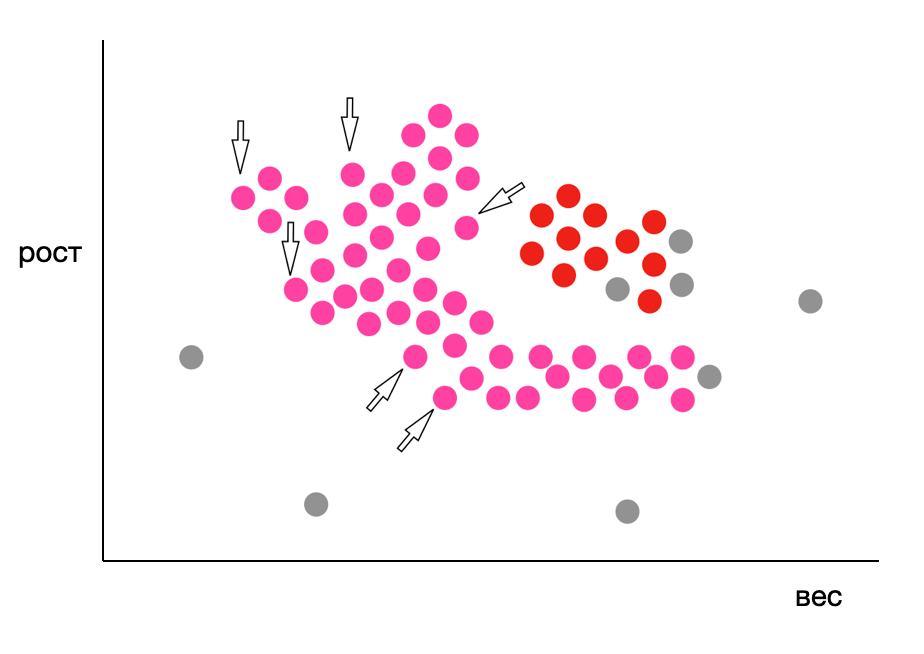

5. Далее переходим к неразмеченной области в данных (второй кластер с красными точками). Заново повторяем алгоритм, начиная с пункта 3, и в итоге получаем второй, синий, кластер:

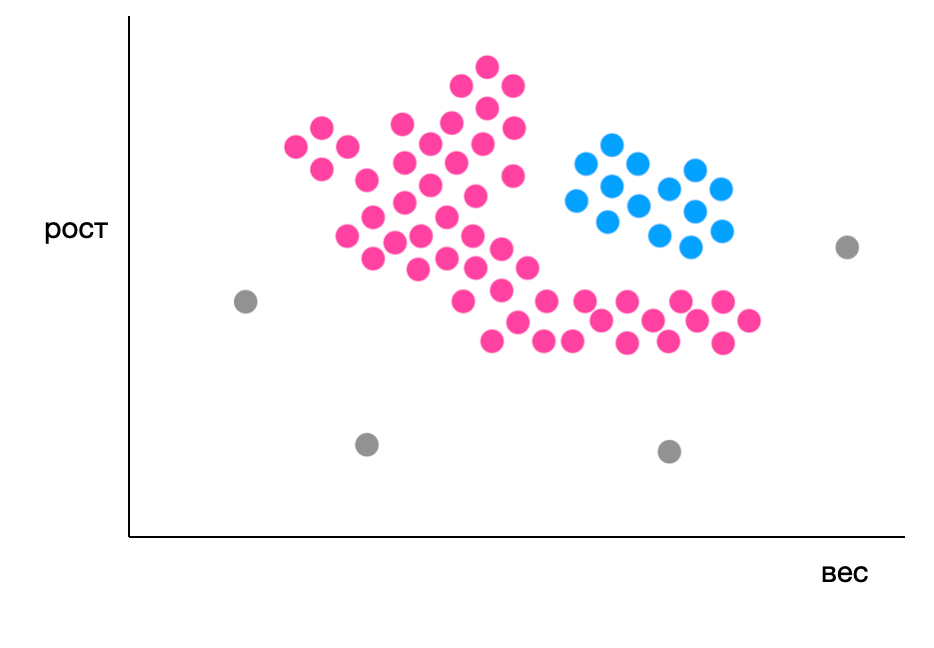

Точки, которые не имеют соседей в заданном радиусе, считаются выбросами и не принадлежат ни к одному кластеру. На рисунке выше они обозначены серым.

# ДЛЯ КАКИХ ЗАДАЧ ИСПОЛЬЗУЕТСЯ DBSCAN?

### Данный алгоритм довольно популярный — областей его применения много.

+ Можно использовать DBSCAN для разработки системы рекомендаций в магазине. Если мы точно не знаем, на какие группы можно разделить пользователей, то на основе того, что покупают люди, можно провести DBSCAN-кластеризацию.

Например, два покупателя оказались в одном кластере: один купил печенье, книгу и плед, а второй — только книгу и плед. На основе этой информации мы можем порекомендовать второму покупателю купить ещё и печенье.

+ Данный алгоритм успешно справляется с поиском выбросов в данных. Рассмотренные ранее алгоритмы кластеризации, в отличие от DBSCAN, не выделяют выбросы в отдельные объекты.

Это свойство алгоритма можно использовать для поиска отклонений медицинских показателей пациентов или для анализа финансового мошенничества.

+ Часто DBSCAN применяют для кластеризации геоданных, так как он может выделять данные сложной формы.

Например, на основе статистики заказов такси в пятничный вечер с помощью кластеризации можно выделить районы города, куда можно поехать отдыхать в преддверии выходных. Ваши коллеги из отдела Data Science в компании «Ситимобил» провели такой анализ для Петербурга и получили следующие результаты:

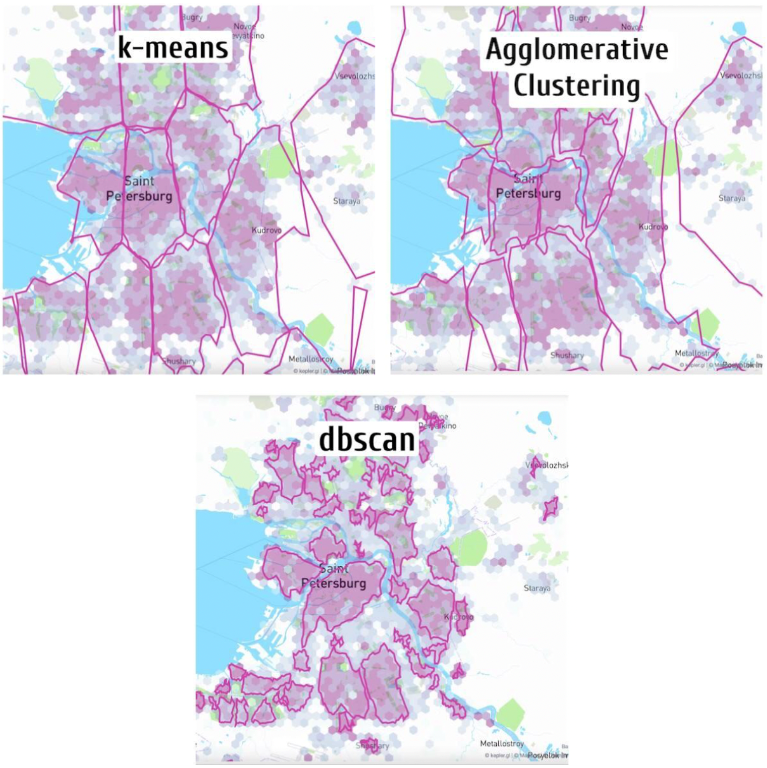

Как мы можем заметить, алгоритм DBSCAN лучше всего справляется с задачей, выделяя сложные участки на карте.

# КАК ЗАПУСТИТЬ DBSCAN В SKLEARN?

Запуск алгоритма довольно простой и похож на запуск k-means. Вновь обратимся к нашему датасету с покемонами.

In [1]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns
# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 

# загружаем данные
df = pd.read_csv('data/pokemon.csv')

In [2]:
X = df[['Attack', 'Defense']]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


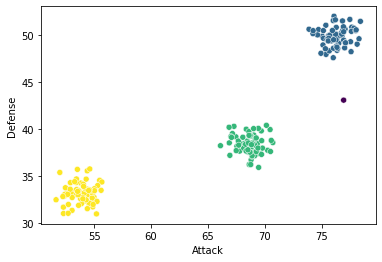

In [3]:
# импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=3, min_samples=3).fit(df[['Attack', 'Defense']])

# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(df.Attack, df.Defense, c=clustering.labels_)

Основные параметры для запуска **DBSCAN:**

+ eps — это радиус, про который мы говорили выше, когда рассматривали алгоритм. Это один из важнейших параметров в алгоритме DBSCAN. Попробуйте изменять его и посмотрите, как будут меняться кластеры в зависимости от значения параметра. Если данные разрежённые, значение радиуса должно быть больше. Если же данные расположены довольно близко друг к другу, значение радиуса можно уменьшить.
+ min_samples — задаёт необходимое количество точек, которое должно быть в заданном радиусе от точки, чтобы она считалась центральной.

### В данном случае мы не задавали количество кластеров, алгоритм смог сам разделить данные. Также DBSCAN смог выделить выброс в данных.

# ПРЕИМУЩЕСТВА И НЕДОСТАТКИ DBSCAN

## ПРЕИМУЩЕСТВА

+ Не нужно задавать количество кластеров.
+ Устойчив к шуму и выбросам, может находить выбросы в данных.
+ Способен найти кластеры любой геометрической формы.

## НЕДОСТАТКИ

+ Не может качественно кластеризовать наборы данных с большой разницей в плотности.
+ Равноудалённые от двух кластеров объекты могут быть отнесены к тому кластеру, с которого алгоритм начал работать, что не всегда оказывается верным.
+ Бывает сложно подобрать eps.

Итак, мы рассмотрели наиболее популярные алгоритмы кластеризации. Давайте подведём итог и соберём основную информацию по разным видам кластеризации в таблицу:

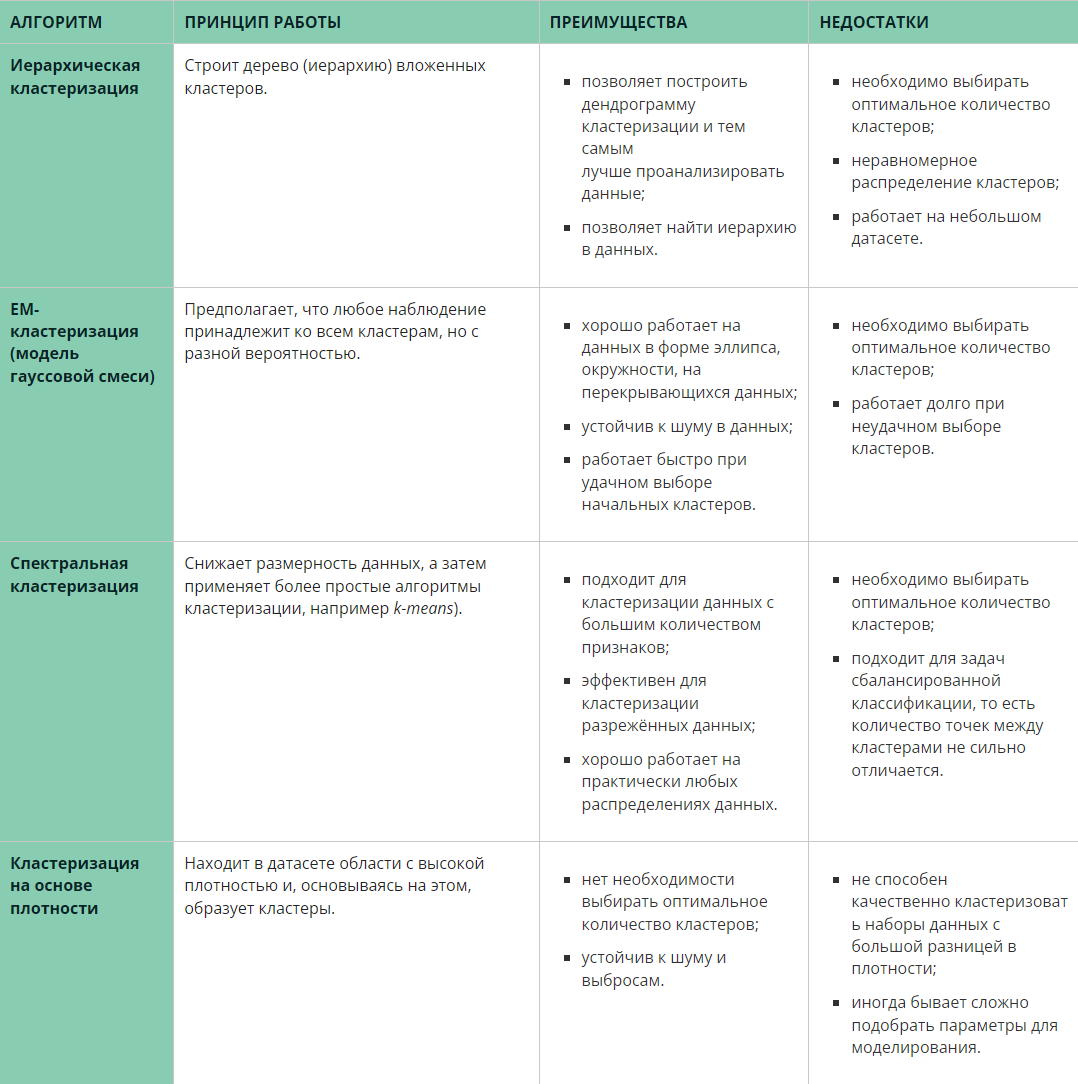

## Задание 7.1

От каких параметров зависят результаты работы алгоритма DBSCAN?

+ Радиус и количество соседей вокруг объекта

## Задание 7.2

Выберите верные утверждения об алгоритме DBSCAN:

+ Для запуска алгоритма не нужно задавать количество кластеров.
+ Алгоритм хорошо работает с данными произвольной формы.
+ Алгоритм способен находить выбросы в датасете.


## Задание 7.3

Какой алгоритм кластеризации способен находить выбросы в данных?

+ DBSCAN

## Задание 7.4

Для датасета с ценами квартир проведите кластеризацию DBSCAN с параметрами по умолчанию. Визуализируйте результаты. Сколько точек было размечено как выбросы?

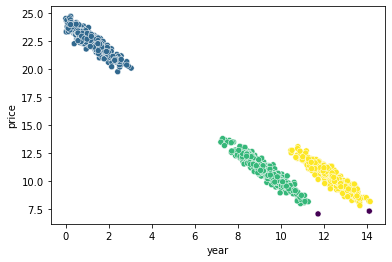

In [4]:
df = pd.read_csv('data/housing.csv')

from sklearn.cluster import DBSCAN
dbscan_clustering = DBSCAN()
# обучаем модель DBSCAN и делаем предсказания
predictions_dbscan = dbscan_clustering.fit_predict(X=df[['year', 'price']])
# визуализируем результаты
sns.scatterplot(x=df.year, y=df.price, c=predictions_dbscan)

## Задание 7.5


В предыдущем задании алгоритм DBSCAN ошибочно определил точку у жёлтого кластера как выброс. Так произошло потому, что алгоритм запускался с параметрами по умолчанию.

Какие значения параметров eps и min_samples подойдут для верной кластеризации данных?

+ eps = 0.7, min_samples = 6
+ eps = 0.7, min_samples = 5

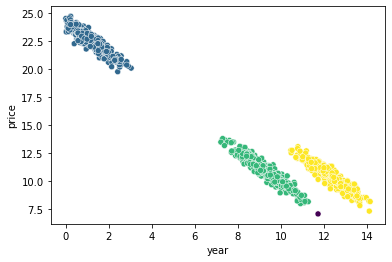

In [6]:
from sklearn.cluster import DBSCAN

dbscan_clustering = DBSCAN(eps=0.7, min_samples=5)
predictions_dbscan = dbscan_clustering.fit_predict(X=df[['year', 'price']])
sns.scatterplot(x=df.year, y=df.price, c=predictions_dbscan)